In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggel_dataset'

In [3]:
%cd /content/gdrive/MyDrive/kaggel_dataset

/content/gdrive/MyDrive/kaggel_dataset


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df=pd.read_csv('/content/gdrive/MyDrive/kaggel_dataset/cars_raw.csv')

In [63]:
df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

***Modifying 'Price' Column***

In [65]:
# remove rows with 'not priced'
df=df[df['Price']!='Not Priced']

#remove symbols and convert all entries to integers
df['Price'] = [x.replace('$','') for x in df['Price']]
df['Price']=[int(x.replace(',','')) for x in df['Price']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
df.shape

(9374, 32)

***Aggregating 'Certified' Values***

In [67]:
df['Used/New']= ['Certified Pre-Owned' if 'certified' in item.casefold()
                else 'Used' for item in df['Used/New']]

In [45]:
df['Used/New'].unique()

array(['Used', 'Certified Pre-Owned'], dtype=object)

***Modifying 'Drivetrain' Column***

In [68]:
#Remove rows with the dash

df=df[df['Drivetrain'] !='_']

In [69]:
df.shape

(9374, 32)

In [70]:
df['Drivetrain']=['4WD' if 'four' in item.casefold()
                 else 'AWD' if 'all' in item.casefold()
                 else 'RWD' if 'rear' in item.casefold()
                 else 'FWD' for item in df['Drivetrain']]

***Create Dummy Variables for Predictive Modeling***

In [71]:
df['Drivetrain'].unique()

array(['FWD', '4WD', 'RWD', 'AWD'], dtype=object)

In [72]:
df['FuelType'].unique()

array(['Gasoline', 'Gasoline Fuel', 'Electric Fuel System',
       'E85 Flex Fuel', 'Electric', 'Hybrid', 'Plug-In Electric/Gas', '–',
       'Flex Fuel Capability', 'Diesel', 'Diesel Fuel',
       'Gasoline/Mild Electric Hybrid', 'Flexible Fuel'], dtype=object)

In [73]:
#Remove rows that contain dashes in the 'FuelType' column

df=df[df['FuelType'] !='–']

In [74]:
df['FuelType'].unique()

array(['Gasoline', 'Gasoline Fuel', 'Electric Fuel System',
       'E85 Flex Fuel', 'Electric', 'Hybrid', 'Plug-In Electric/Gas',
       'Flex Fuel Capability', 'Diesel', 'Diesel Fuel',
       'Gasoline/Mild Electric Hybrid', 'Flexible Fuel'], dtype=object)

In [75]:
df.shape

(9344, 32)

In [76]:
#Modify 'FuelType' column
df['FuelType'] = ['Hybrid' if 'hybrid' in item.casefold()
                 else 'Hybrid' if 'plug' in item.casefold()
                 else 'Flex' if 'flex' in item.casefold()
                 else 'Electric' if 'electric' in item.casefold()
                 else 'Diesel' if 'diesel' in item.casefold()
                 else 'Gas' for item in df['FuelType']]

#Modify 'DealType' column
df['DealType'].fillna('None', inplace=True)
df = df[df['DealType'] != 'None']

#New Columns
df['TransmissionType'] = ['Automatic' if 'auto' in item.casefold()
                         else 'Manual' if 'manual' in item.casefold()
                         else 'Other' for item in df['Transmission']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [77]:
df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,TransmissionType
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,FWD,19,27,Gas,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,Automatic
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,4WD,19,24,Gas,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,Automatic
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,4WD,15,21,Gas,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,Automatic
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,FWD,20,27,Gas,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,Automatic
5,2012,Toyota,4Runner SR5,Used,23541,4.7,34,Dealer,AutoNation Toyota Hayward,4.4,...,RWD,17,23,Gas,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469,Automatic


In [78]:
df.columns

Index(['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating',
       'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating',
       'SellerReviews', 'StreetName', 'State', 'Zipcode', 'DealType',
       'ComfortRating', 'InteriorDesignRating', 'PerformanceRating',
       'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating',
       'ExteriorColor', 'InteriorColor', 'Drivetrain', 'MinMPG', 'MaxMPG',
       'FuelType', 'Transmission', 'Engine', 'VIN', 'Stock#', 'Mileage',
       'TransmissionType'],
      dtype='object')

***the most cars popular***

In [79]:
most_make=df['Make'].value_counts(ascending=False)
most_make

BMW              922
Toyota           785
Mercedes-Benz    783
Honda            702
Ford             568
Jeep             491
Lexus            477
Audi             416
Chevrolet        407
Subaru           294
Cadillac         282
Nissan           247
GMC              244
Kia              239
Acura            224
INFINITI         215
Hyundai          210
Mazda            203
Tesla            163
Land             159
Volvo            148
RAM              144
Volkswagen       139
Dodge            136
Porsche          119
Lincoln          119
Buick            114
Alfa              38
Chrysler          33
Jaguar            28
Mitsubishi        20
Genesis           18
Maserati          15
MINI               5
Scion              4
Bentley            3
Lamborghini        3
FIAT               2
Mercury            2
Saturn             1
Name: Make, dtype: int64

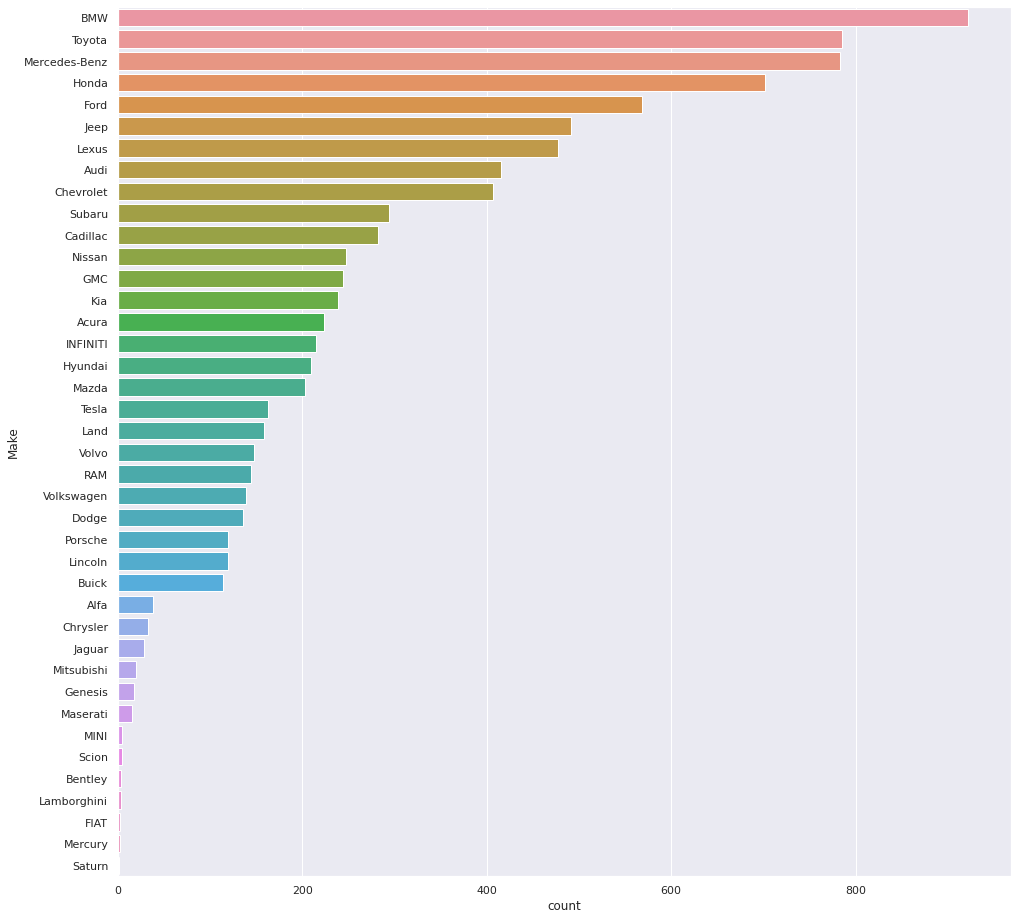

In [80]:
plt.figure(figsize=(16,16))
sns.set_theme(style='darkgrid')
sns.countplot(y='Make',data=df,order= df['Make'].value_counts().index)

***the most cars expensive***

In [81]:
data=df.groupby('Make')[['Price']].mean().sort_values('Price',ascending=False)
data

,Price
Make,
Lamborghini,249483.333333
Bentley,80655.333333
Tesla,68208.263804
Porsche,68124.134454
Land,57860.132075
Maserati,50788.000000
RAM,50578.270833
GMC,49566.495902
Genesis,48352.500000


In [82]:
data=df.groupby('Make')[['Price']].mean().sort_values('Price',ascending=False).index

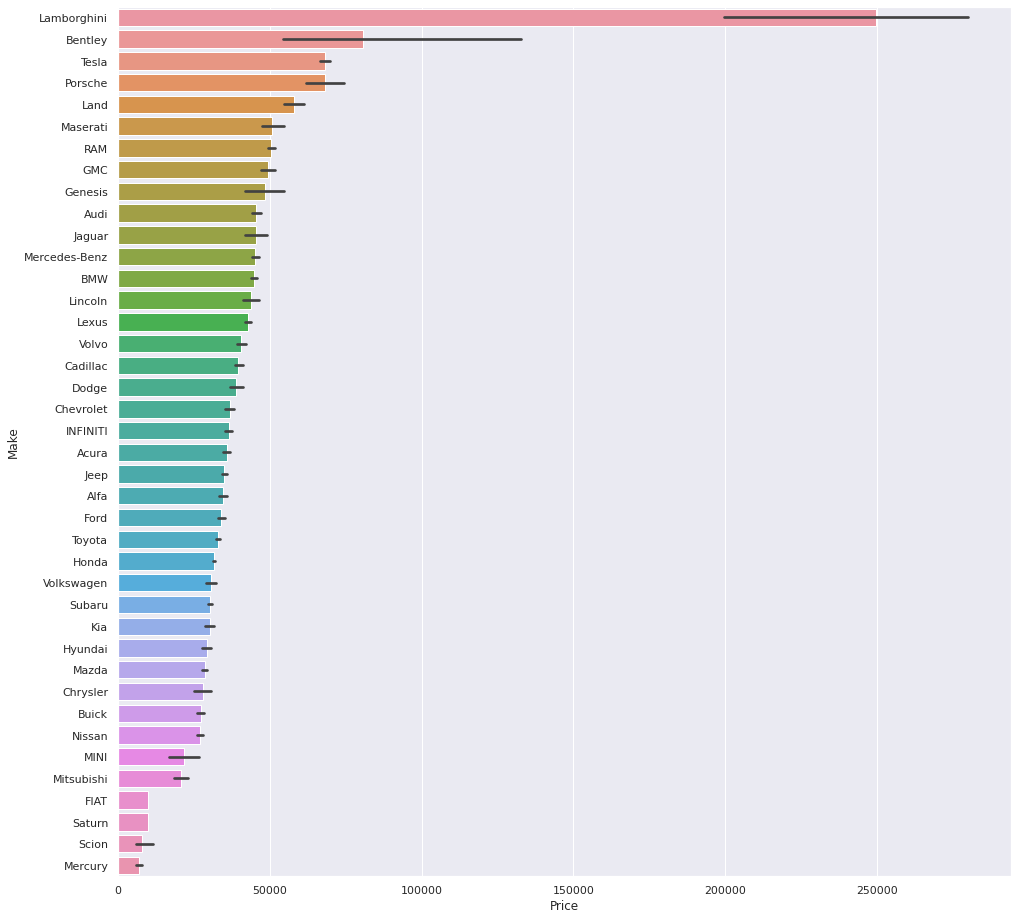

In [83]:
plt.figure(figsize=(16,16))
sns.set_theme(style='darkgrid')
sns.barplot(y=df['Make'],x=df['Price'],order=data)

***The lowest cars have a rating***

In [84]:
data=df.groupby('Make')[['ConsumerRating']].mean().sort_values('ConsumerRating',ascending=False)
data

,ConsumerRating
Make,
Genesis,4.838889
Mazda,4.813300
Lamborghini,4.800000
Bentley,4.800000
Volvo,4.795946
Dodge,4.783088
Porsche,4.782353
RAM,4.778472
Mitsubishi,4.775000


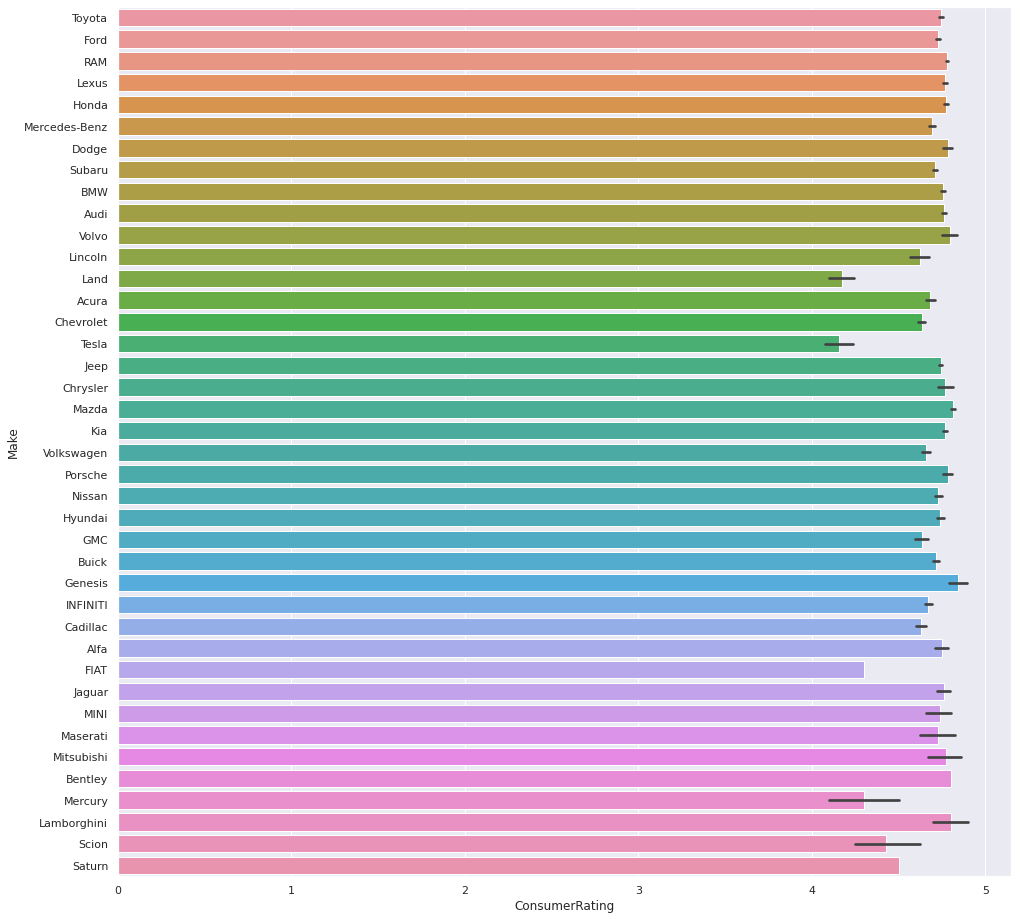

In [85]:
plt.figure(figsize=(16,16))
sns.set_theme(style='darkgrid')
sns.barplot(y=df['Make'],x=df['ConsumerRating'])

***What kind of sellers,condition of cars,DealType & Drivetrain do customers prefer?***

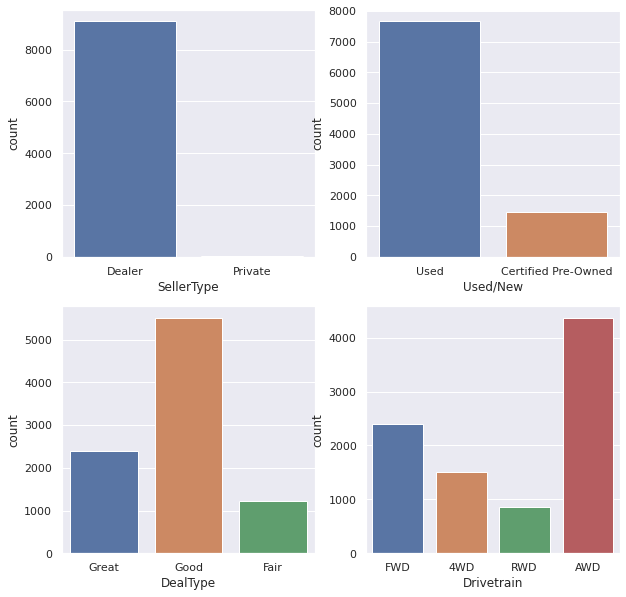

In [86]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(x='SellerType',data=df)

plt.subplot(2,2,2)
sns.countplot(x='Used/New',data=df)

plt.subplot(2,2,3)
sns.countplot(x='DealType',data=df)

plt.subplot(2,2,4)
sns.countplot(x='Drivetrain',data=df)

***the most popular fuel***

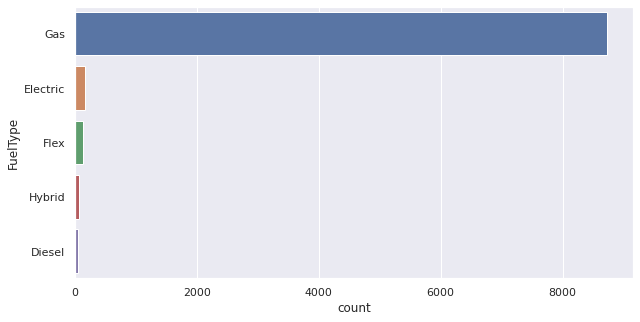

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(y='FuelType',data=df)

***price of most popular cars per each year***

<Figure size 1440x2160 with 0 Axes>

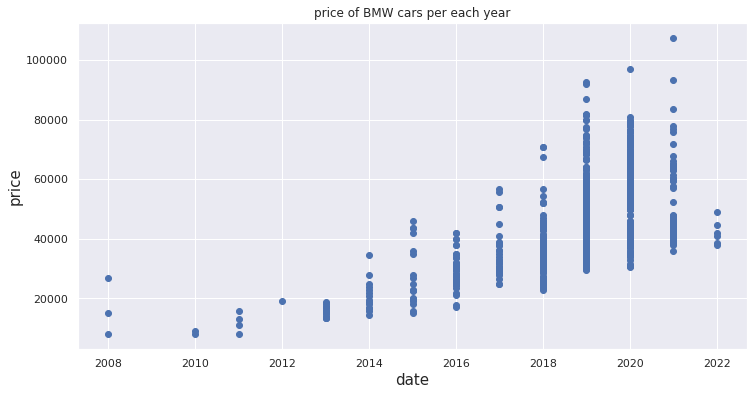

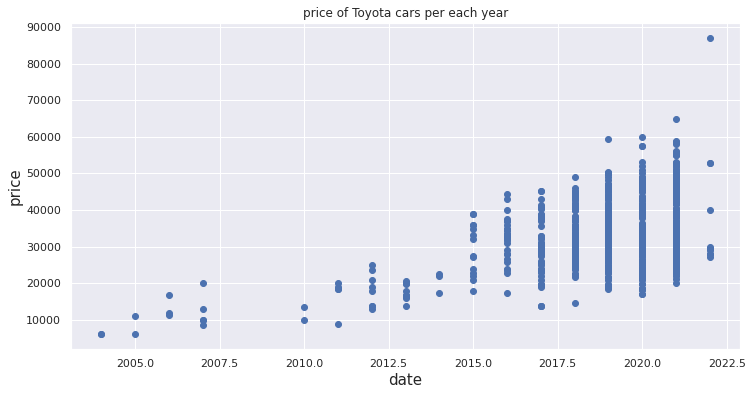

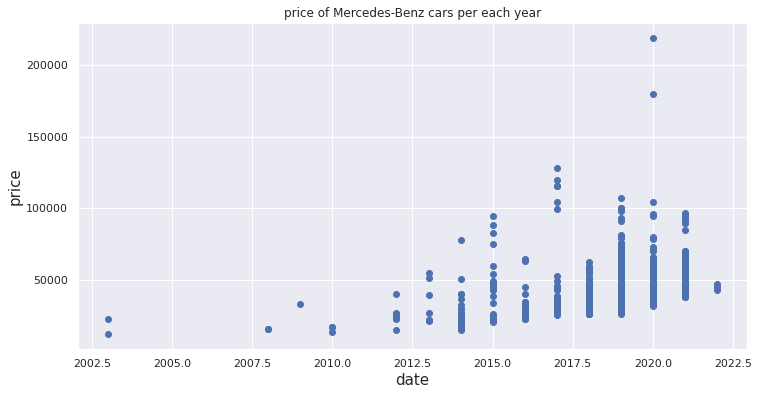

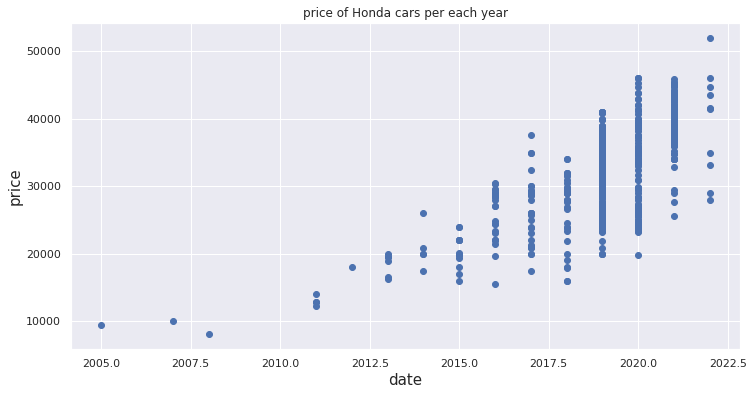

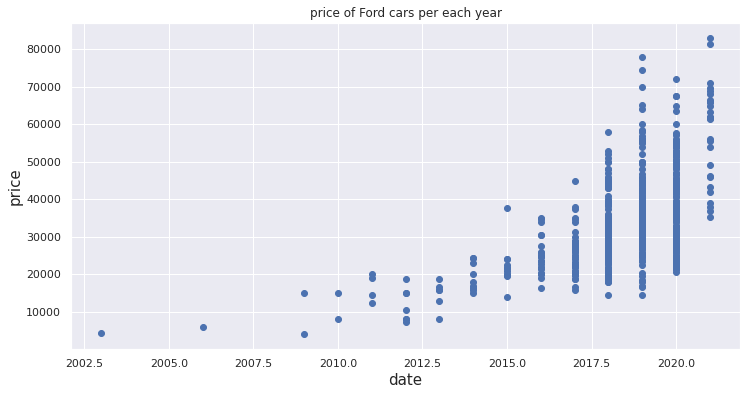

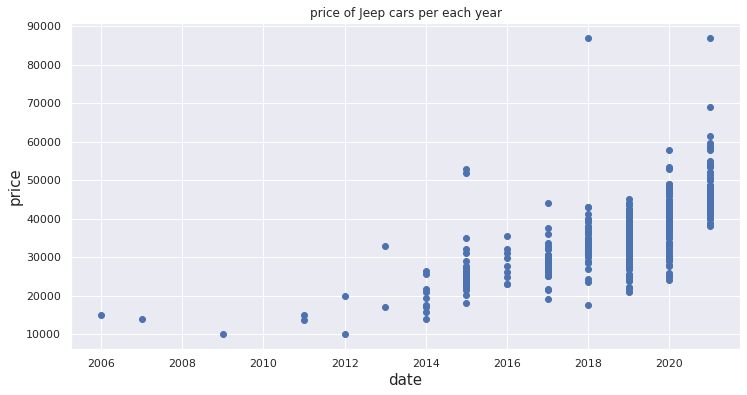

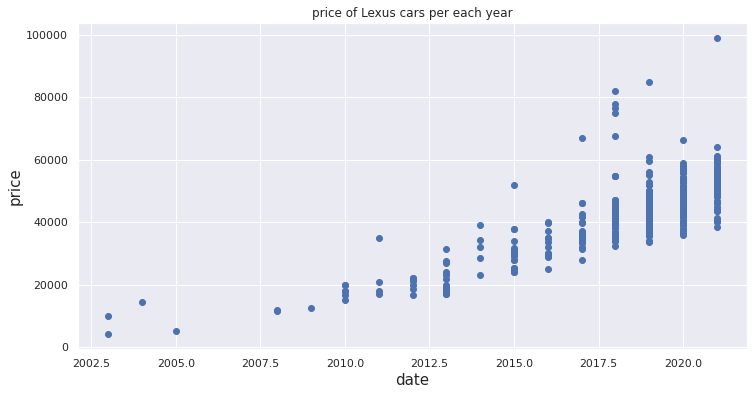

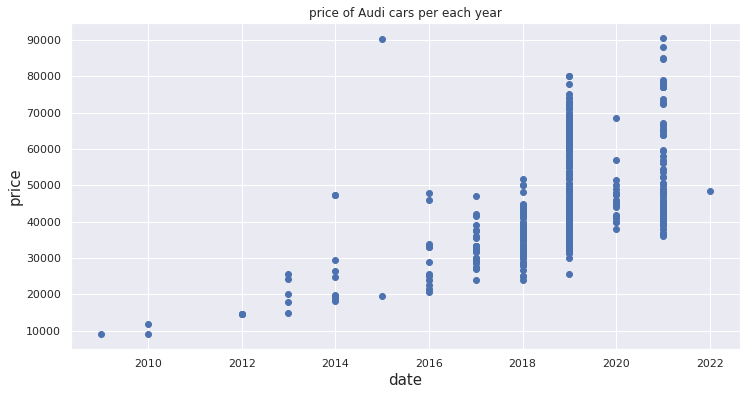

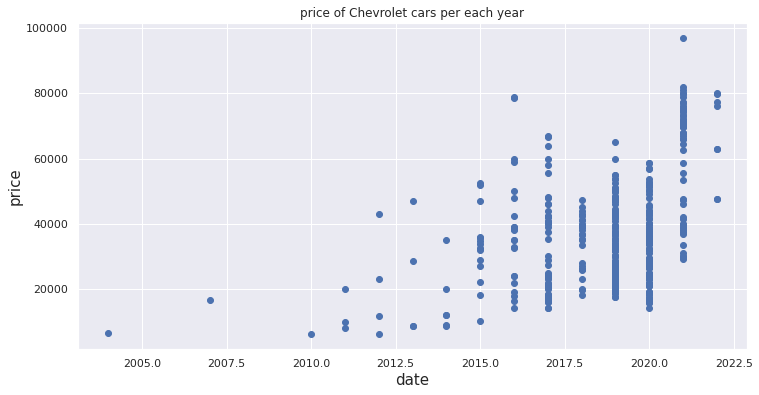

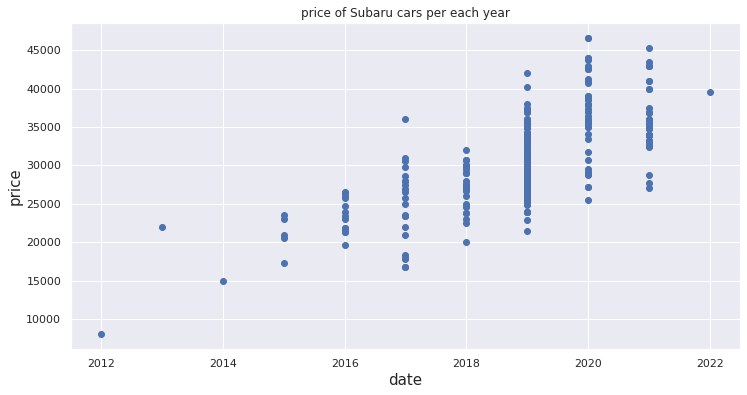

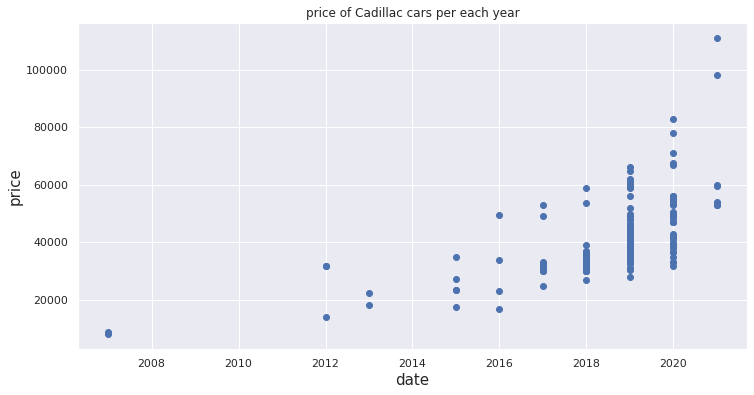

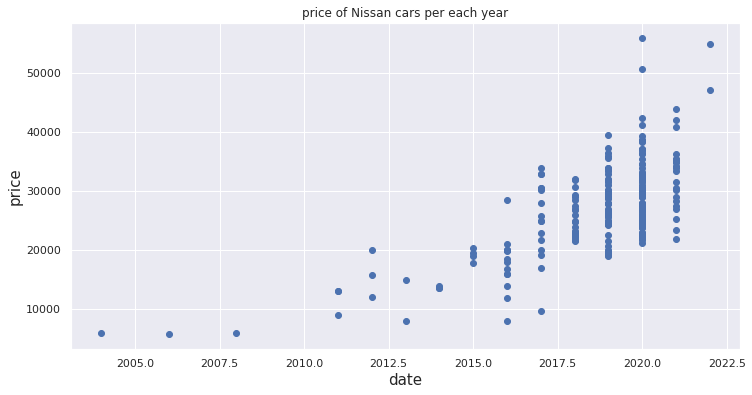

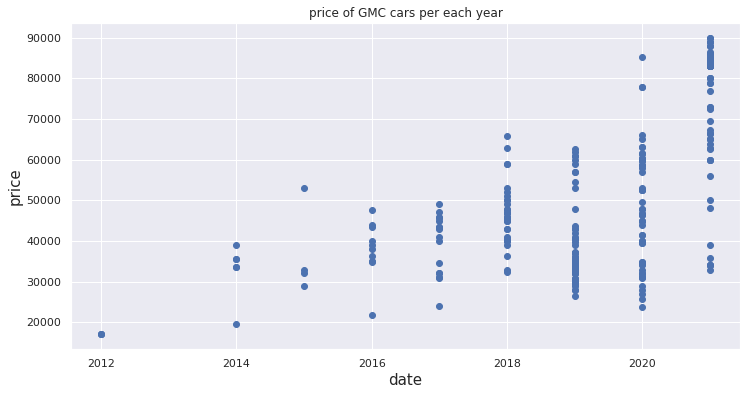

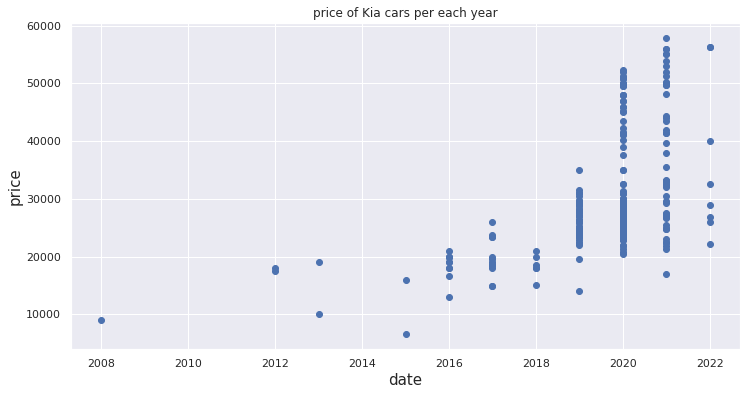

In [88]:
plt.figure(figsize=(20,30))

cars=['BMW','Toyota','Mercedes-Benz','Honda','Ford','Jeep','Lexus','Audi','Chevrolet','Subaru','Cadillac','Nissan','GMC','Kia']
for car in cars:
    plt.figure(figsize=(12,6))
    plt.scatter(df[df['Make']==car].Year,df[df['Make']==car].Price)
    plt.title('price of {} cars per each year'.format(car))
    plt.xlabel('date',fontsize=15)
    plt.ylabel('price',fontsize=15)

***states with the most demand for cars***

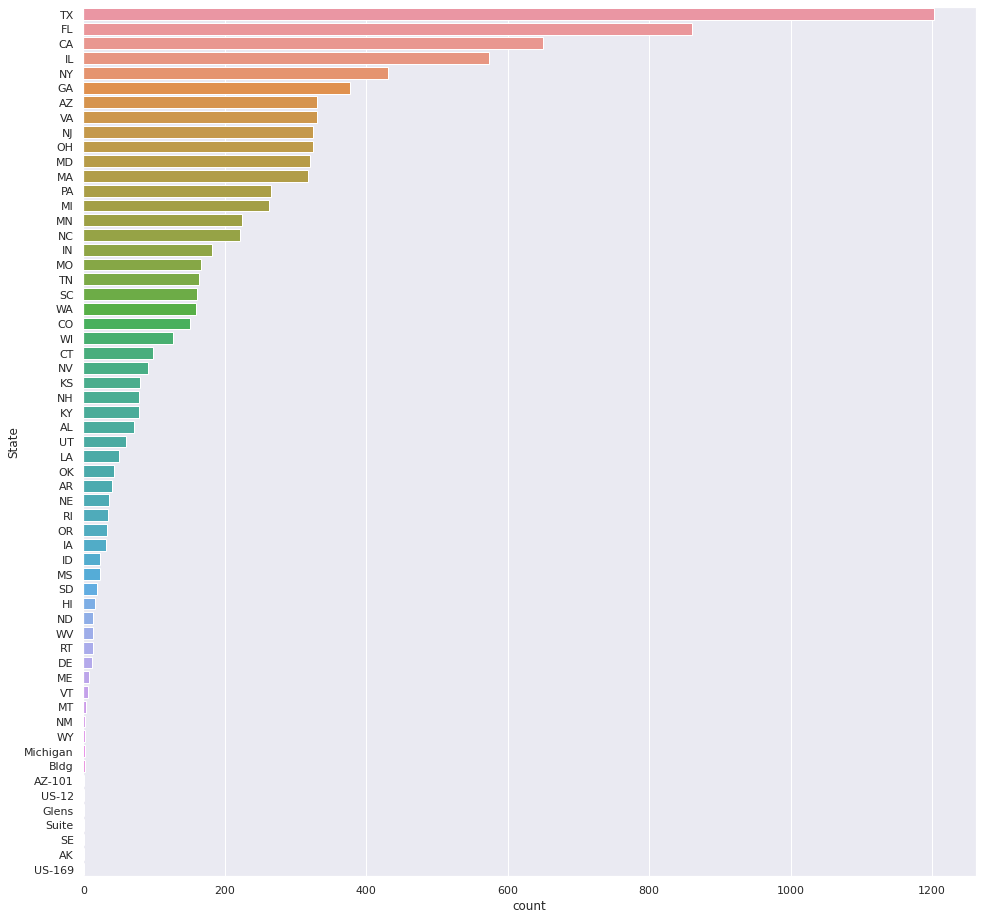

In [89]:
plt.figure(figsize=(16,16))
sns.set_theme(style='darkgrid')
sns.countplot(y=df['State'],data=df,order= df['State'].value_counts().index)

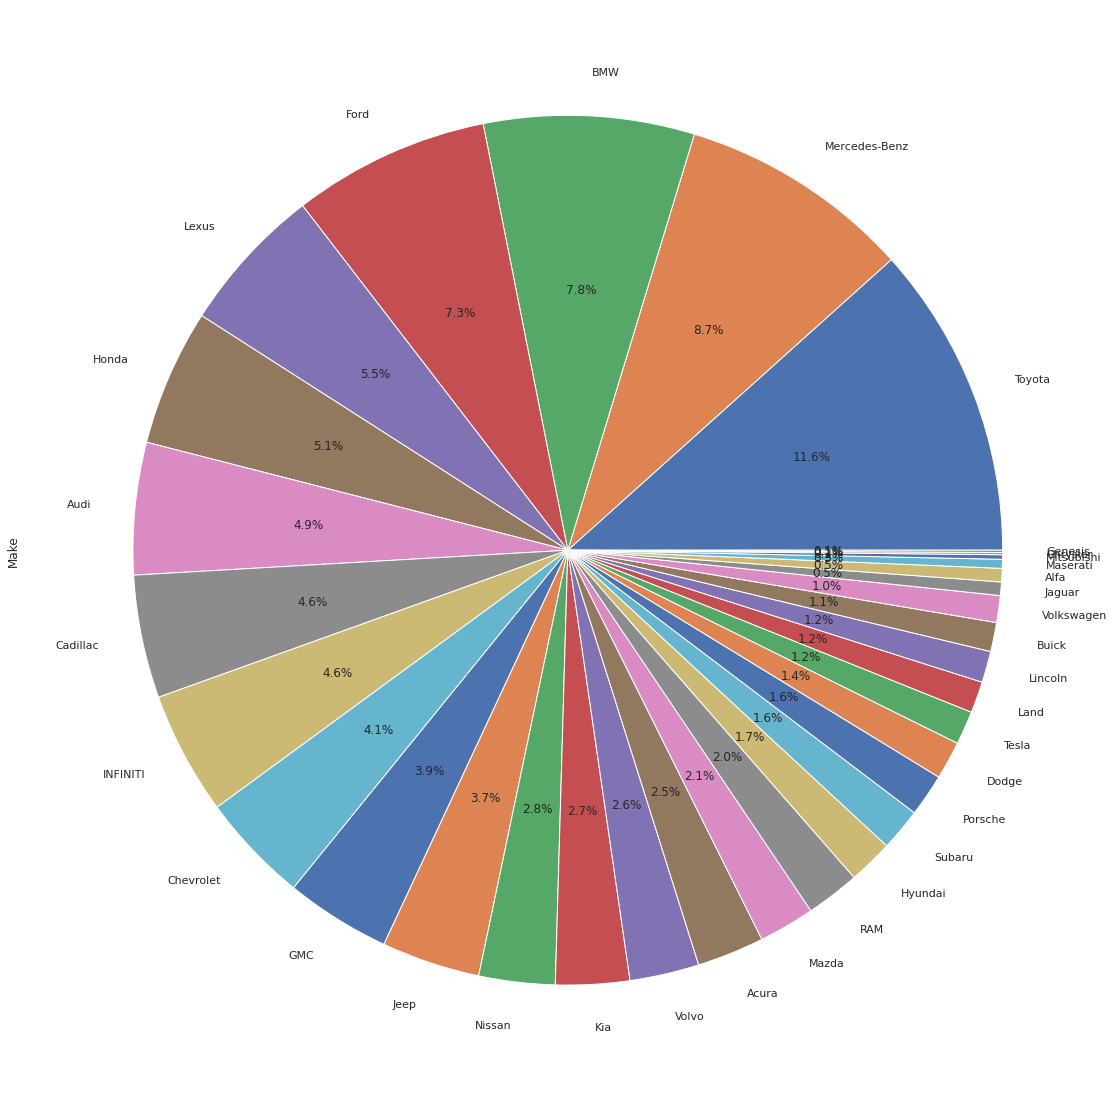

In [90]:
plt.figure(figsize=(20,20))
df[df['State']=='TX'].Make.value_counts().plot.pie(autopct='%1.1f%%')

***removing outliers fpr price***

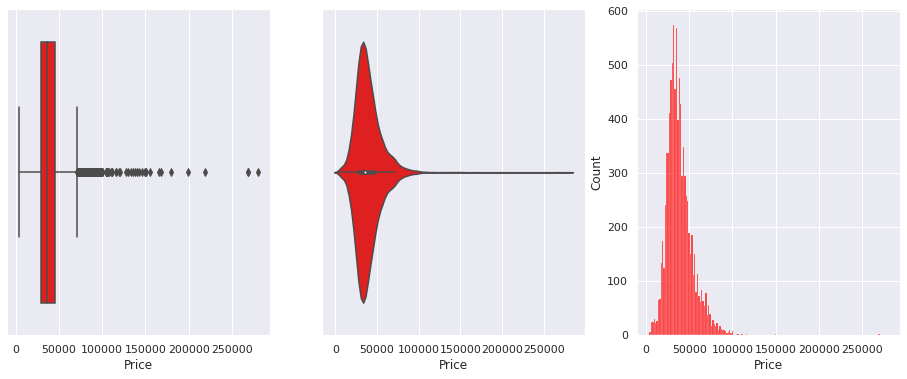

In [91]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(data=df,x='Price',color='red')

plt.subplot(1,3,2)
sns.violinplot(data=df,x='Price',color='red')

plt.subplot(1,3,3)
sns.histplot(data=df,x='Price',color='red')

In [92]:
median=df.loc[df['Price']<=80000,'Price'].median()
df.loc[df.Price>=80000]=np.nan
df.fillna(median,inplace=True)

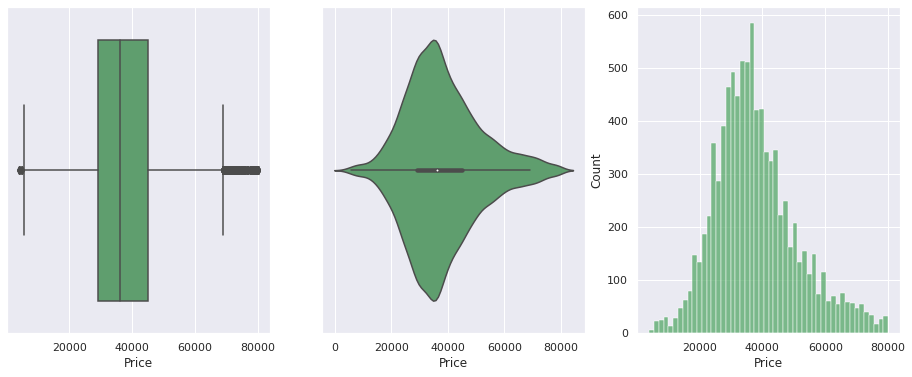

In [93]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(data=df,x='Price',color='g')

plt.subplot(1,3,2)
sns.violinplot(data=df,x='Price',color='g')

plt.subplot(1,3,3)
sns.histplot(data=df,x='Price',color='g')

# ***ML***

In [94]:
df=pd.get_dummies(df,columns=['Used/New','Drivetrain','FuelType','TransmissionType'])

In [95]:
x=df.drop(['Year', 'Make', 'Model','Price','ConsumerReviews','SellerName', 'SellerRating','SellerReviews', 'StreetName', 'State',
           'Zipcode', 'DealType', 'ComfortRating', 'InteriorDesignRating', 'PerformanceRating','ValueForMoneyRating', 'ExteriorStylingRating',
           'ReliabilityRating','ExteriorColor', 'InteriorColor','MinMPG', 'MaxMPG', 'Engine', 'VIN', 'Stock#','Transmission','SellerType'],axis=1)

In [96]:
y=df['Price']

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [98]:
print('x_train_shap:' ,x_train.shape)
print('x_test_shap:'  ,x_test.shape)
print('y_train_shap:' ,y_train.shape)
print('y_test_shap:'  ,y_test.shape)

x_train_shap: (7297, 20)
x_test_shap: (1825, 20)
y_train_shap: (7297,)
y_test_shap: (1825,)


**linear regression**

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
lr.intercept_, lr.coef_

(19447660.205307454,
 array([-2.21982163e+03, -2.23230294e-01,  1.51069440e+07, -7.55368021e+06,
        -7.55326379e+06,  1.51069440e+07, -3.77103094e+06, -3.77620011e+06,
        -3.78529806e+06, -3.77441488e+06,  1.51069440e+07, -3.02041002e+06,
        -3.00450613e+06, -3.03410312e+06, -3.02775866e+06, -3.02016605e+06,
         1.51069440e+07, -5.03238884e+06, -5.03798482e+06, -5.03657033e+06]))

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

y_pred=lr.predict(x_test)
lr_scores=cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
lr_scores_rmse = np.sqrt(-lr_scores)

In [102]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lr_scores_rmse)

Scores: [10321.61127483 10619.6291982  10331.51419074 10091.90096092
 10492.36774338 10265.76500992 10070.32072988 10356.18339576
 10328.16234386 10735.76931917]
Mean: 10361.32241666503
Standard deviation: 198.51911228533393


Text(0, 0.5, 'Predicted Y')

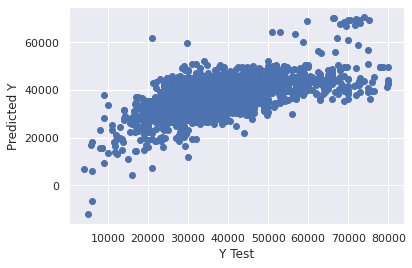

In [103]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

 ***RandomForestRegressor***


In [104]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [105]:
y_pred=tree.predict(x_test)
tree_scores=cross_val_score(tree,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_scores_rmse = np.sqrt(-tree_scores)

In [106]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_scores_rmse)

Scores: [12608.36357609 12308.8182845  12214.03950856 12488.91579226
 12812.60901549 12095.38003022 13107.96799282 12253.26599958
 12610.69793194 13220.65622417]
Mean: 12572.07143556277
Standard deviation: 360.80331849542426


Text(0, 0.5, 'Predicted Y')

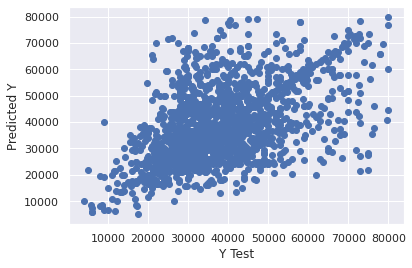

In [107]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**SVR**

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred=svr.predict(x_test)
svr_scores=cross_val_score(svr,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
svr_scores_rmse = np.sqrt(-svr_scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(svr_scores_rmse)

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

***Tweedi eRegressor***

In [108]:
from sklearn.linear_model import TweedieRegressor
clf=TweedieRegressor()
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


TweedieRegressor()

In [109]:
y_pred=clf.predict(x_test)
clf_scores=cross_val_score(clf,x_train,y_train,scoring="neg_mean_squared_error", cv=15)
clf_scores_rmse = np.sqrt(-clf_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

In [110]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(clf_scores_rmse)

Scores: [11098.25513346 11329.06319996 12398.20214709 11802.7727562
 11451.55496545 11030.54896677 11855.82617265 10953.74653971
 11932.07512719 10714.06675944 11989.30897063 11386.43082233
 12408.54493444 11239.9245621  12099.39125046]
Mean: 11579.314153858702
Standard deviation: 513.2573264094982


Text(0, 0.5, 'Predicted Y')

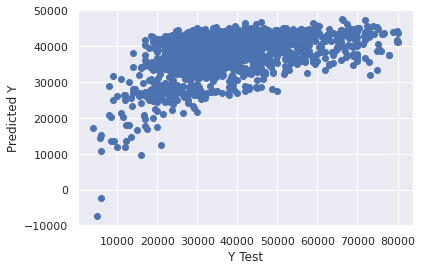

In [111]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

***Gaussian Process Regressor (GPR)***

In [112]:
from sklearn.gaussian_process import GaussianProcessRegressor
GPR=GaussianProcessRegressor()
GPR.fit(x_train,y_train)

GaussianProcessRegressor()

In [113]:
y_pred=GPR.predict(x_test)
GPR_scores=cross_val_score(GPR,x_train,y_train,scoring="neg_mean_squared_error", cv=10)
GPR_scores_rmse = np.sqrt(-GPR_scores)

In [114]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(GPR_scores_rmse)

Scores: [33541.21919396 33575.58993041 34872.85522108 34051.87907142
 34342.72724037 34174.52110325 33957.52341219 33971.02447297
 34784.54153795 34607.47752828]
Mean: 34187.93587118736
Standard deviation: 440.1216063735414


Text(0, 0.5, 'Predicted Y')

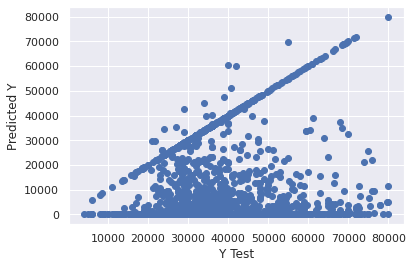

In [115]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')